
Testpoints classification
---------------------------
Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu

Userpoints classification
-------------------------
The number is positive!
Sample with (width, height): (34.0, 45.0) classified as Pikachu
10 neighbours is Pikachu
Sample with (width, height): (34.0, 45.0) can be classified as Pikachu


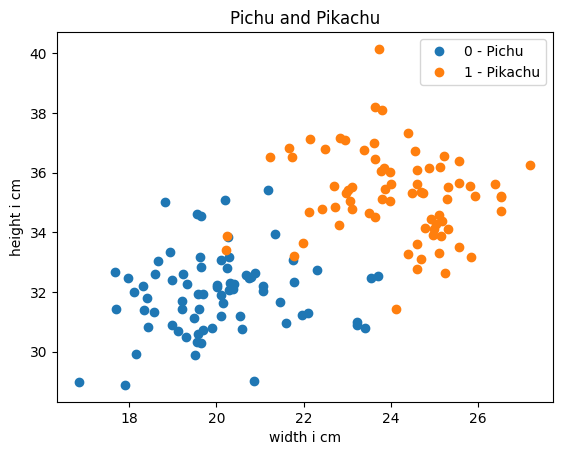

In [12]:
import matplotlib.pyplot as plt
import math 

# defines a function to calculate euclidean distance between datapoints and testpoints
def euclidean_dist(x1, y1):
     global dist  # makes the variable global for later use in another function
     dist = [(math.sqrt((x1 - x2)**2 + (y1 - y2)**2),label) for x2, y2, label in zip(Pokemon_w,Pokemon_h,Pokemon_l)]
     dist.sort()

     if dist[0][1] == 0:
          print(f"Sample with (width, height): {(x1, y1)} classified as Pichu")
     else: 
          print(f"Sample with (width, height): {(x1, y1)} classified as Pikachu")
      

# defines a function to calculate distance between ten nearest datapoints and userpoint
def n_neighbours(user_w,user_h):
     Pichu_n = [l[1] for l in dist[:10] if l[-1] == 0]
     Pikachu_n = [l[1] for l in dist[:10] if l[-1] == 1]
        
     if len(Pichu_n) > len(Pikachu_n):
          print(f"{len(Pichu_n)} nearest neighbours is Pichu")
          print(f"Sample with (width, height): {(user_w, user_h)} can be classified as Pichu")
     elif len(Pichu_n) < len(Pikachu_n):
          print(f"{len(Pikachu_n)} neighbours is Pikachu")
          print(f"Sample with (width, height): {(user_w, user_h)} can be classified as Pikachu")
     elif len(Pichu_n) == len(Pikachu_n):
          Pichu_n = [l[1] for l in dist[:11] if l[-1] == 0]
          Pikachu_n = [l[1] for l in dist[:11] if l[-1] == 1]
          if len(Pichu_n) > len(Pikachu_n):
              print(f"{len(Pichu_n)} nearest neighbours is Pichu")
              print(f"Sample with (width, height): {(user_w, user_h)} can be classified as Pichu")
          else: 
               print(f"{len(Pikachu_n)} neighbours is Pikachu")
               print(f"Sample with (width, height): {(user_w, user_h)} can be classified as Pikachu")    
    

# cleans and sorts the files
# opens "datapoints.txt" for reading
# removes first line, any leading and trailing whitespaces 
# replaces comma with whitespaces for later conversion of string to float
# splits lists into sublists for accessing elements from the sublists
with open("datapoints.txt", "r") as f_read:
     lists = [l.strip(" \n").replace(",","").split() for l in f_read.readlines() if l[0].isdigit()] 
     Pokemon_w = [float(l[0]) for l in lists] 
     Pokemon_h = [float(l[1]) for l in lists]
     Pokemon_l = [int(l[2]) for l in lists]
     Pichu = [l[:] for l in lists if l[-1] == '0'] 
     Pikachu = [l[:] for l in lists if l[-1] == '1']
     
     
# cleans and sorts "testpoints.txt"     
# opens "testpoints.txt" for reading
# removes first line, any leading and trailing whitespaces 
# replaces comma with whitespaces for later conversion string to float
# splits lists into sublists for accessing elements from the sublists
with open("testpoints.txt", "r") as t_read:
     t_data = [l.strip("\n").replace(",","").split() for l in t_read.readlines() if l[0].isdigit()]
     x_data = [float(i.replace("(","").replace(")","")) for l in t_data for i in l[1::3]]
     y_data = [float(i.replace("(","").replace(")","")) for l in t_data for i in l[2::3]]


# plotts datapoints 
x1 = [float(i[0]) for i in Pichu]   # Pichu width
x2 = [float(i[0]) for i in Pikachu] # Pikachu width 
y1 = [float(i[1]) for i in Pichu]   # Pichu height 
y2 = [float(i[1]) for i in Pikachu] # Pikachu height

plt.plot(x1,y1,'o',label='0 - Pichu')
plt.plot(x2,y2,'o',label='1 - Pikachu')
plt.title('Pichu and Pikachu')
plt.xlabel('width i cm')
plt.ylabel('height i cm')
plt.legend(fontsize = 10)


# calculates the distance between datapoints and testpoints 
# calls the function 
print("\nTestpoints classification")
print("---------------------------")
dist1 = euclidean_dist(x_data[0],y_data[0])
dist2 = euclidean_dist(x_data[1],y_data[1])
dist3 = euclidean_dist(x_data[2],y_data[2])
dist4 = euclidean_dist(x_data[3],y_data[3])


# calculates the distance between datapoints and userpoints 
print("\nUserpoints classification")
print("-------------------------")
while True:
     user_w = input("Enter width: ")
     user_h = input("Enter height: ")

     try:
          user_w, user_h = float(user_w), float(user_h)
          if user_w < 0 or user_h < 0:
               print("The number can not be negative!")
               continue
          else:
               print("The number is positive!")

     except ValueError:
          print("The number should be integer or float")
          continue

     user_dist = euclidean_dist(user_w,user_h) # calls the function
     user_n = n_neighbours(user_w,user_h)      # calls the function   
     try_again = input("Will you try again? (y for yes)").lower() # lower() method returns the lowercased input in case of capitalized user input
     if try_again != 'y':
          break



The average accuracy of model is 0.980


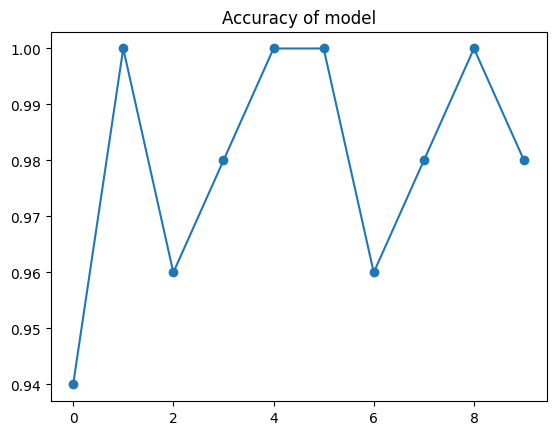

In [13]:
# Extra exercises

import random as rnd
import matplotlib.pyplot as plt 
import numpy as np


# defines a function to calculate euclidean distance between random datapoints and random testpoints
def pokemon_distance(list,width,height):    
    distance = []               
    for l in list:
        d = [math.sqrt((l[0] - width)**2 + (l[1] - height)**2), l[2]] # adds labels to the list with calculated distances 
        distance.append(d)
    distance.sort()
    return distance


# cleans and sorts the files
# opens "datapoints.txt" for reading
# removes first line, any leading and trailing whitespaces 
# replaces comma with whitespaces for later conversion of string to float
# splits lists into sublists for accessing elements from the sublists
with open("datapoints.txt", "r") as f_read:
    lists = [l.strip(" \n").replace(",","").split()for l in f_read.readlines() if l[0].isdigit()] 
    Pichu_list = [l[:] for l in lists if l[-1] == '0'] 
    Pikachu_list = [l[:] for l in lists if l[-1] == '1']


# nested while loop generates ten times 2 random lists with datapoints and 2 random lists with testpoints
# inner loops calculate the amount of TP, FP, FP, FN  for each of randomly generated lists
# sample() function returns lists of randomly selected items from the original file without changing it
count  = 0
accuracy_list = []
while count < 10:
    # creates lists of randomly selected items from the original file, converts sublists' string items to floats
    Pichu_train = [[float(i) for i in l] for l in rnd.sample(Pichu_list,50)]     
    Pichu_test = [[float(i) for i in l] for l in rnd.sample(Pichu_list,25)]
    Pikachu_train = [[float(i) for i in l] for l in rnd.sample(Pikachu_list,50)]
    Pikachu_test = [[float(i) for i in l] for l in rnd.sample(Pikachu_list,25)]
    Pokemon_train = Pichu_train + Pikachu_train
    Pichu_test_w, Pichu_test_h = [i[0] for i in Pichu_test],[i[1] for i in Pichu_test]   # Pichu wiidth and height 
    Pikachu_test_w, Pikachu_test_h = [i[0] for i in Pikachu_test],[i[1] for i in Pikachu_test] # Pikachu width and height

    Pikachu_count = 0
    TP = 0           # Pikachu actual, Pikachu predicted
    FP = 0           # Pichu actual, Pikachu predicted

    while Pikachu_count < 25:
        Pikachu_d = pokemon_distance(Pokemon_train, Pikachu_test_w[Pikachu_count], Pikachu_test_h[Pikachu_count])
        if Pikachu_d[0][1] == 1.0:
            TP+=1    
        else:
            FP+=1
        Pikachu_count += 1

    Pichu_count = 0
    TN = 0          # Pichu actual, Pichu predicted
    FN = 0          # Pikachu actual, Pichu predicted

    while Pichu_count < 25: 
        Pichu_d = pokemon_distance(Pokemon_train, Pichu_test_w[Pichu_count], Pichu_test_h[Pichu_count])
        if Pichu_d[0][1] == 0.0:
            TN+=1
        else:
            FN+=1
        Pichu_count += 1

    # calculates the percentage of correctly classified data 
    accuracy = (TP + TN) / (TP+TN+FP+FN)  # the number of misclassified samples/ the number of total samples
    accuracy_list.append(accuracy)
    count += 1


# calculates the average accuracy
average_accuracy = np.mean(accuracy_list)
print(f"The average accuracy of model is {average_accuracy:.3f}")

    
# plots the accuracy 
plt.plot(accuracy_list, '-o')
plt.title('Accuracy of model')
plt.show()

